# LOAN DEFAULT PREDICTION

### **PART 1 - DATA QUALITY**
Exploratory Data Analysis and foundational data understanding
- Overall dataset inspection and structure analysis
- Target variable distribution analysis (critical for imbalanced data)
- Missing value pattern identification across all variables
- Data quality assessment (duplicates, outliers, anomalies)
- Baseline statistics and distributions
- Visualization of key patterns
- Foundation insights that guide team preprocessing decisions

### 1. Setup and Imports

In [302]:
# !pip install pandas numpy matplotlib plotnine joblib seaborn

In [303]:
# Imports
import pandas as pd
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt
import warnings, os, json
from IPython.display import display
from pathlib import Path
from pprint import pprint

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)

In [304]:
# Plot theme
theme_set(
    theme_minimal()
    + theme(
        figure_size=(18, 8),
        text=element_text(size=11),
        plot_title=element_text(size=16, fontweight="bold"),
        plot_subtitle=element_text(size=12, fontstyle="italic"),
        axis_title=element_text(size=12),
        axis_text=element_text(size=10),
        legend_text=element_text(size=10),
        legend_position="bottom",
    )
)

In [305]:
# Paths
RAW_CSV = "case_data.csv"
OUT_DIR = Path("processed_data")
OUT_DIR.mkdir(parents=True, exist_ok=True)
ARTIFACT_DIR = Path("artifacts")
ARTIFACT_DIR.mkdir(parents=True, exist_ok=True)

### 2. Data Exploration (EDA)

#### Data Loading

In [306]:
df = pd.read_csv(RAW_CSV)
print("Dataset shape:", df.shape)

Dataset shape: (20000, 68)


#### General Overview of the Dataset

In [307]:
# Quick peek
display(df.head())

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,Cash loans,M,Y,N,1,225000.0,918468.0,28966.5,697500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.016612,-14086,-3028,-643,-4911,1,0,1,0,0,Drivers,3,2,2,THURSDAY,13,0,0,0,0,0,0,Self-employed,0.566907,0.770087,0.0,0.0,0.0,0.0,-4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,Cash loans,M,Y,Y,0,157500.0,299772.0,20160.0,247500.0,Family,Working,Secondary / secondary special,Single / not married,Rented apartment,0.020713,-8728,-1157,-3494,-1368,1,0,1,0,0,Laborers,1,3,3,SATURDAY,6,0,0,0,1,1,0,Business Entity Type 2,0.346634,0.678568,0.0,0.0,0.0,0.0,-925,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,Cash loans,M,N,N,0,108000.0,509602.5,26149.5,387000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.018634,-12931,-1317,-6392,-3866,1,0,1,0,0,Drivers,2,2,2,THURSDAY,12,0,0,0,1,1,0,Government,0.236378,0.062103,0.0,0.0,0.0,0.0,-3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,Cash loans,F,N,Y,0,90000.0,225000.0,11074.5,225000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.028663,-19334,-3494,-2419,-2893,1,0,1,1,0,Cleaning staff,2,2,2,SATURDAY,8,0,0,0,0,0,0,Business Entity Type 3,0.651406,0.461482,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,Cash loans,F,N,Y,0,112500.0,512064.0,25033.5,360000.0,Family,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008575,-11144,-1104,-7846,-2904,1,0,1,0,0,Private service staff,2,2,2,TUESDAY,12,0,0,0,0,0,0,Services,0.627300,NaN,2.0,0.0,2.0,0.0,-397,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,5.0


### Humanized Column Names
We can use janitor to clean up the column names for better readability. You can install janitor via pip if you haven't already:

```bash
pip install pyjanitor
```

```python
from janitor import clean_names
df = df.clean_names()
df.head().T
```

In [308]:
# humanize column names for better readability using janitor
import janitor
df = df.clean_names()  # Convert column names to snake_case
print("Columns after cleaning:")
pprint(df.columns.tolist())

Columns after cleaning:
['target',
 'name_contract_type',
 'code_gender',
 'flag_own_car',
 'flag_own_realty',
 'cnt_children',
 'amt_income_total',
 'amt_credit',
 'amt_annuity',
 'amt_goods_price',
 'name_type_suite',
 'name_income_type',
 'name_education_type',
 'name_family_status',
 'name_housing_type',
 'region_population_relative',
 'days_birth',
 'days_employed',
 'days_registration',
 'days_id_publish',
 'flag_emp_phone',
 'flag_work_phone',
 'flag_cont_mobile',
 'flag_phone',
 'flag_email',
 'occupation_type',
 'cnt_fam_members',
 'region_rating_client',
 'region_rating_client_w_city',
 'weekday_appr_process_start',
 'hour_appr_process_start',
 'reg_region_not_live_region',
 'reg_region_not_work_region',
 'live_region_not_work_region',
 'reg_city_not_live_city',
 'reg_city_not_work_city',
 'live_city_not_work_city',
 'organization_type',
 'ext_source_2',
 'ext_source_3',
 'obs_30_cnt_social_circle',
 'def_30_cnt_social_circle',
 'obs_60_cnt_social_circle',
 'def_60_cnt_social

In [309]:
# Calculate basic dataset dimensions
n_rows, n_cols = df.shape          # Number of loan applications and variables
n_predictors = n_cols - 1            # All variables except 'target'

# Display the dataset size information
print("Dataset Dimensions:")
print(f"- Total observations (rows): {n_rows:,}")
print(f"- Total variables (columns): {n_cols}")
print(f"- Predictor variables: {n_predictors}")
print(f"- Response variable: 1 (target)")

Dataset Dimensions:
- Total observations (rows): 20,000
- Total variables (columns): 68
- Predictor variables: 67
- Response variable: 1 (target)


In [310]:
# Classify variables by type
all_cols = df.columns.tolist()

# Get numeric and categorical variables
numeric_vars = df.select_dtypes(include=[np.number]).columns.tolist()
if 'target' in numeric_vars:
    numeric_vars.remove('target')

categorical_vars = df.select_dtypes(include=['object']).columns.tolist()

# Specific variable types based on naming patterns
date_vars = [col for col in numeric_vars if 'days_' in col]
flag_vars = [col for col in all_cols if 'flag_' in col]
amt_vars = [col for col in all_cols if 'amt_' in col]
cnt_vars = [col for col in all_cols if 'cnt_' in col]
ext_vars = [col for col in all_cols if 'ext_source' in col]

other_numeric = [col for col in numeric_vars 
                if col not in date_vars + amt_vars + cnt_vars + ext_vars]

# Create classification summary
var_classification = {
    'Categorical': categorical_vars,
    'Financial Amounts': amt_vars,
    'Date Variables': date_vars,
    'Flag Variables': flag_vars,
    'Count Variables': cnt_vars,
    'External Scores': ext_vars,
    'Other Numeric': other_numeric
}

print("Variable Classification Summary:")
for var_type, vars_list in var_classification.items():
    print(f"  {var_type}: {len(vars_list)} variables")
    if vars_list:
        examples = ', '.join(vars_list[:3])
        if len(vars_list) > 3:
            examples += f" (and {len(vars_list)-3} more)"
        print(f"    Examples: {examples} \n")

Variable Classification Summary:
  Categorical: 12 variables
    Examples: name_contract_type, code_gender, flag_own_car (and 9 more) 

  Financial Amounts: 10 variables
    Examples: amt_income_total, amt_credit, amt_annuity (and 7 more) 

  Date Variables: 5 variables
    Examples: days_birth, days_employed, days_registration (and 2 more) 

  Flag Variables: 24 variables
    Examples: flag_own_car, flag_own_realty, flag_emp_phone (and 21 more) 

  Count Variables: 6 variables
    Examples: cnt_children, cnt_fam_members, obs_30_cnt_social_circle (and 3 more) 

  External Scores: 2 variables
    Examples: ext_source_2, ext_source_3 

  Other Numeric: 32 variables
    Examples: region_population_relative, flag_emp_phone, flag_work_phone (and 29 more) 



In [311]:
# Duplicates
duplicate_count = df.duplicated().sum()
display(pd.DataFrame({'Duplicate_Rows':[duplicate_count]}))

,Duplicate_Rows
0,0


target Variable Distribution:
  0 (No Payment Difficulties): 18,451 (92.3%)
  1 (Payment Difficulties):    1,549 (7.7%)


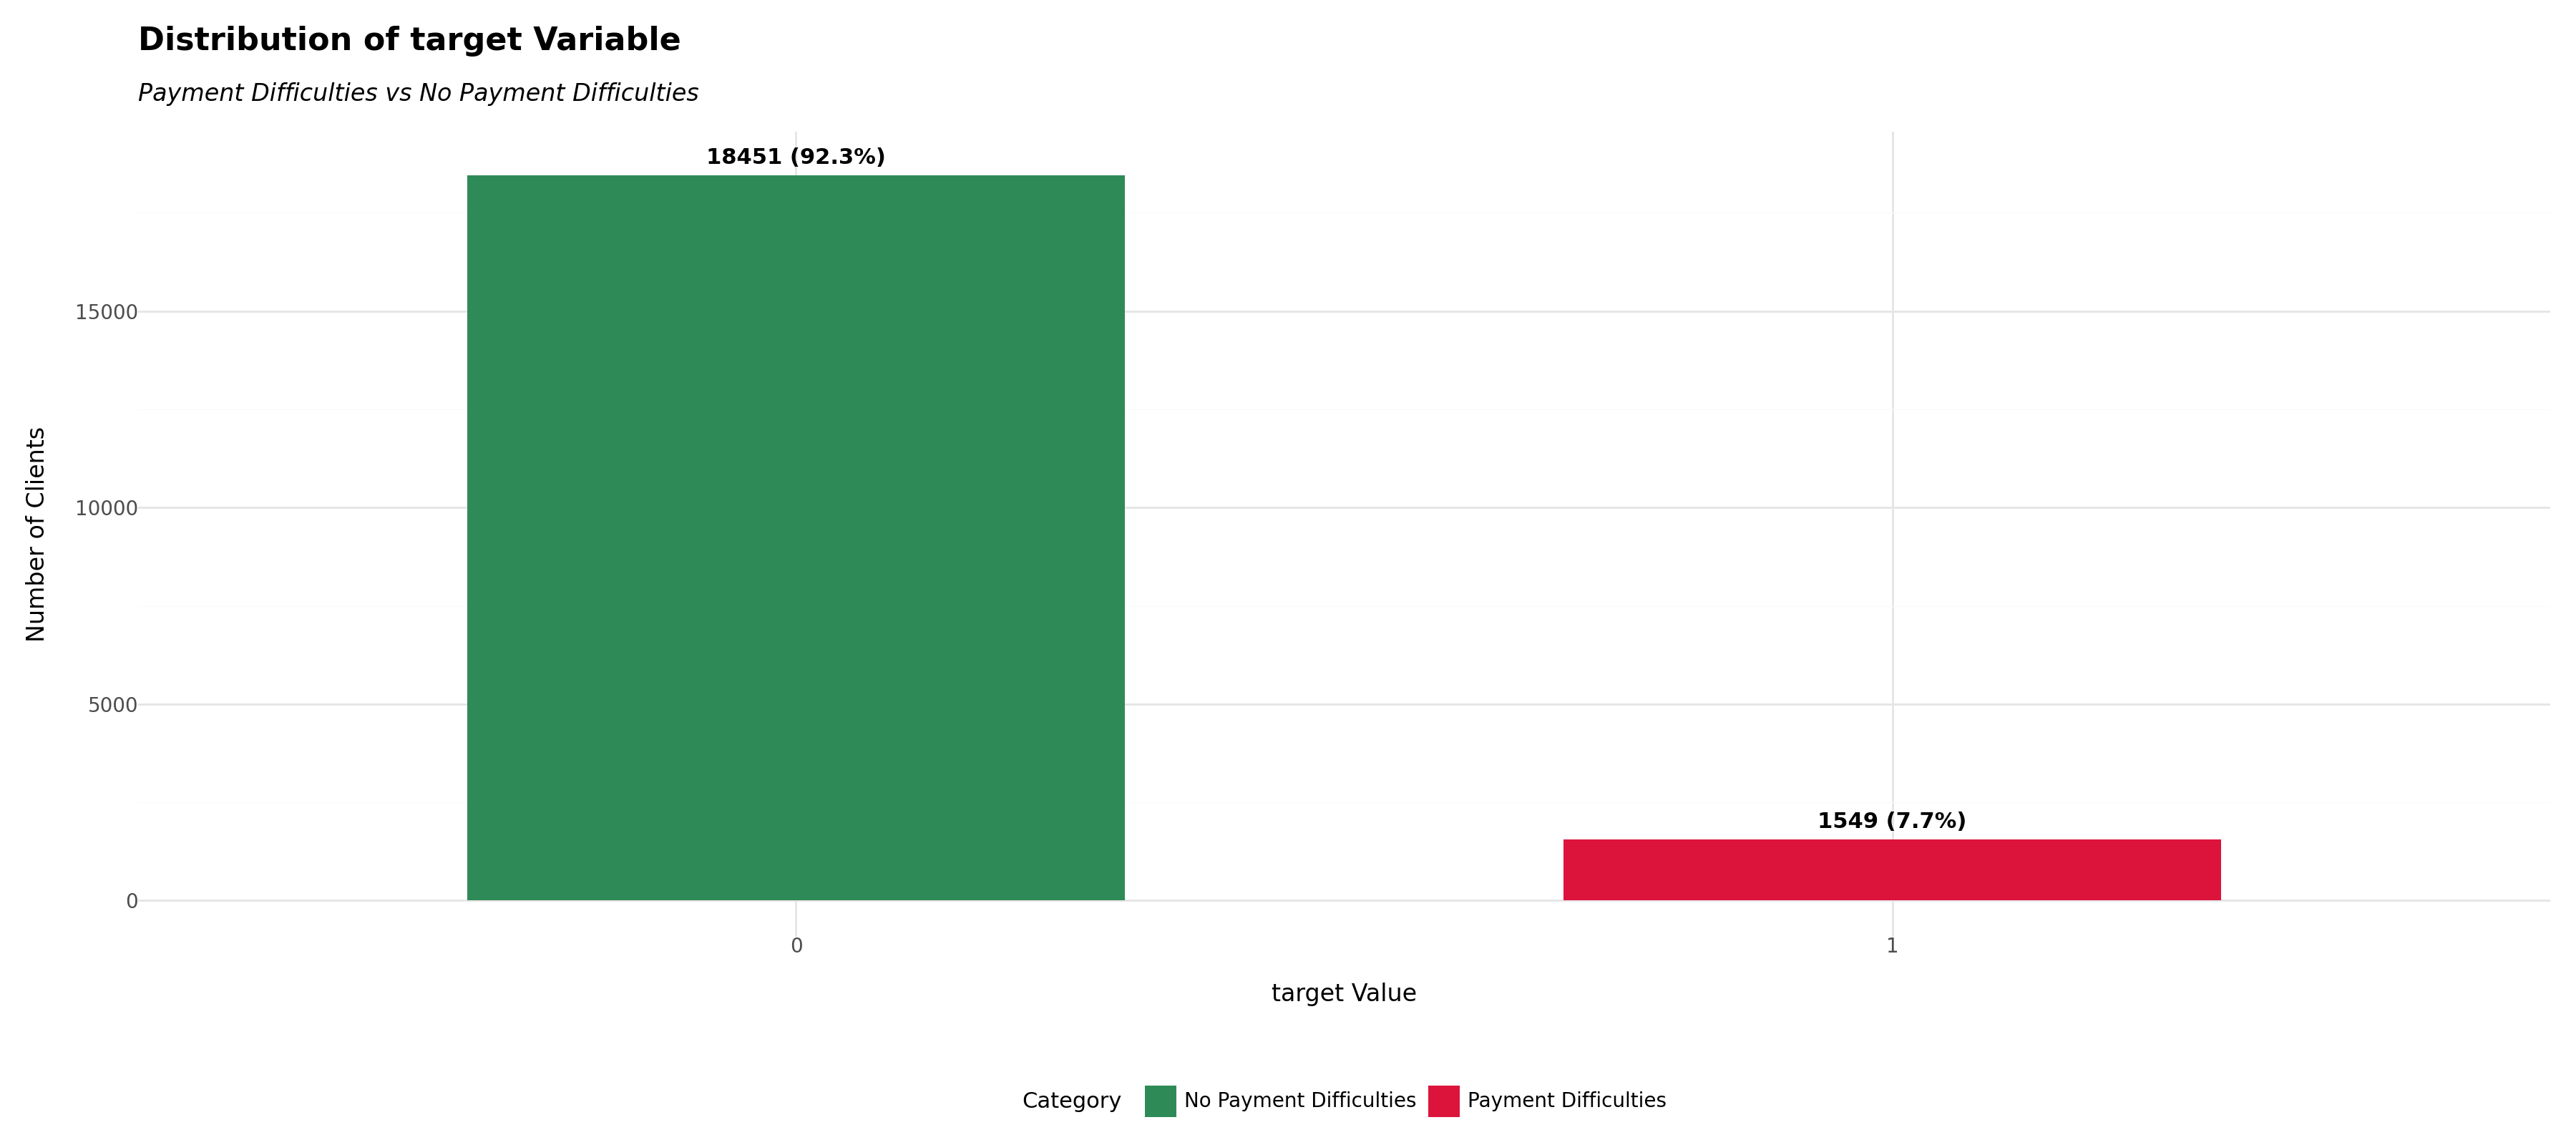

In [312]:
# Analyze our target variable - who had payment difficulties vs who didn't
target_counts = df['target'].value_counts().sort_index()
target_pct = df['target'].value_counts(normalize=True).sort_index() * 100

print("target Variable Distribution:")
print(f"  0 (No Payment Difficulties): {target_counts[0]:,} ({target_pct[0]:.1f}%)")
print(f"  1 (Payment Difficulties):    {target_counts[1]:,} ({target_pct[1]:.1f}%)")

# Prepare data for visualization
target_summary = (df.groupby('target')
                 .size()
                 .reset_index(name='count')
                 .assign(
                     percentage=lambda x: round(x['count'] / x['count'].sum() * 100, 1),
                     label=lambda x: x['target'].map({0: 'No Payment Difficulties', 1: 'Payment Difficulties'})
                 ))

# Add formatted labels to dataframe for display on chart
target_summary['label_text'] = (target_summary['count'].astype(str) + 
                               ' (' + target_summary['percentage'].astype(str) + '%)')

# Create a bar chart to visualize the balance of our outcome variable
plot = (ggplot(target_summary, aes(x='factor(target)', y='count', fill='label')) +
        geom_col(width=0.6) +
        # Add labels showing counts and percentages on the bars
        geom_text(aes(label='label_text'), 
                 va='bottom', nudge_y=target_summary['count'].max() * 0.01, 
                 size=11, fontweight='bold') +
        # Use green for good outcomes, red for payment difficulties
        scale_fill_manual(values={'No Payment Difficulties': '#2E8B57', 
                                'Payment Difficulties': '#DC143C'}) +
        labs(title='Distribution of target Variable',
             subtitle='Payment Difficulties vs No Payment Difficulties',
             x='target Value',
             y='Number of Clients',
             fill='Category'))

plot

In [313]:
# Missing values analysis
missing_data = df.isnull().sum()
missing_pct = (missing_data / len(df)) * 100
missing_summary = (pd.DataFrame({
    'Variable': missing_data.index,
    'Missing_Count': missing_data.values,
    'Missing_Percentage': missing_pct.values
}).query('Missing_Count > 0')
  .sort_values('Missing_Count', ascending=False))

print("Missing Values Summary:")
print(f"Total variables with missing values: {len(missing_summary)}")
print(f"Variables with >50% missing: {sum(missing_summary['Missing_Percentage'] > 50)}")
print(f"Variables with >20% missing: {sum(missing_summary['Missing_Percentage'] > 20)}")
print()

Missing Values Summary:
Total variables with missing values: 16
Variables with >50% missing: 0
Variables with >20% missing: 1



In [314]:
if len(missing_summary) > 0:
    print("Top 10 variables with most missing values:")
    display(missing_summary.head(10).round(2))
else:
    print("No missing values found in the dataset.")

Top 10 variables with most missing values:


,Variable,Missing_Count,Missing_Percentage
25,occupation_type,6290,31.45
39,ext_source_3,3945,19.73
67,amt_req_credit_bureau_year,2701,13.50
66,amt_req_credit_bureau_qrt,2701,13.50
64,amt_req_credit_bureau_week,2701,13.50
65,amt_req_credit_bureau_mon,2701,13.50
62,amt_req_credit_bureau_hour,2701,13.50
63,amt_req_credit_bureau_day,2701,13.50
10,name_type_suite,81,0.40
40,obs_30_cnt_social_circle,54,0.27


In [315]:
full_data_missing_values=df.isnull().sum().sum()
print("Total missing values in full dataset:", full_data_missing_values)

Total missing values in full dataset: 26805


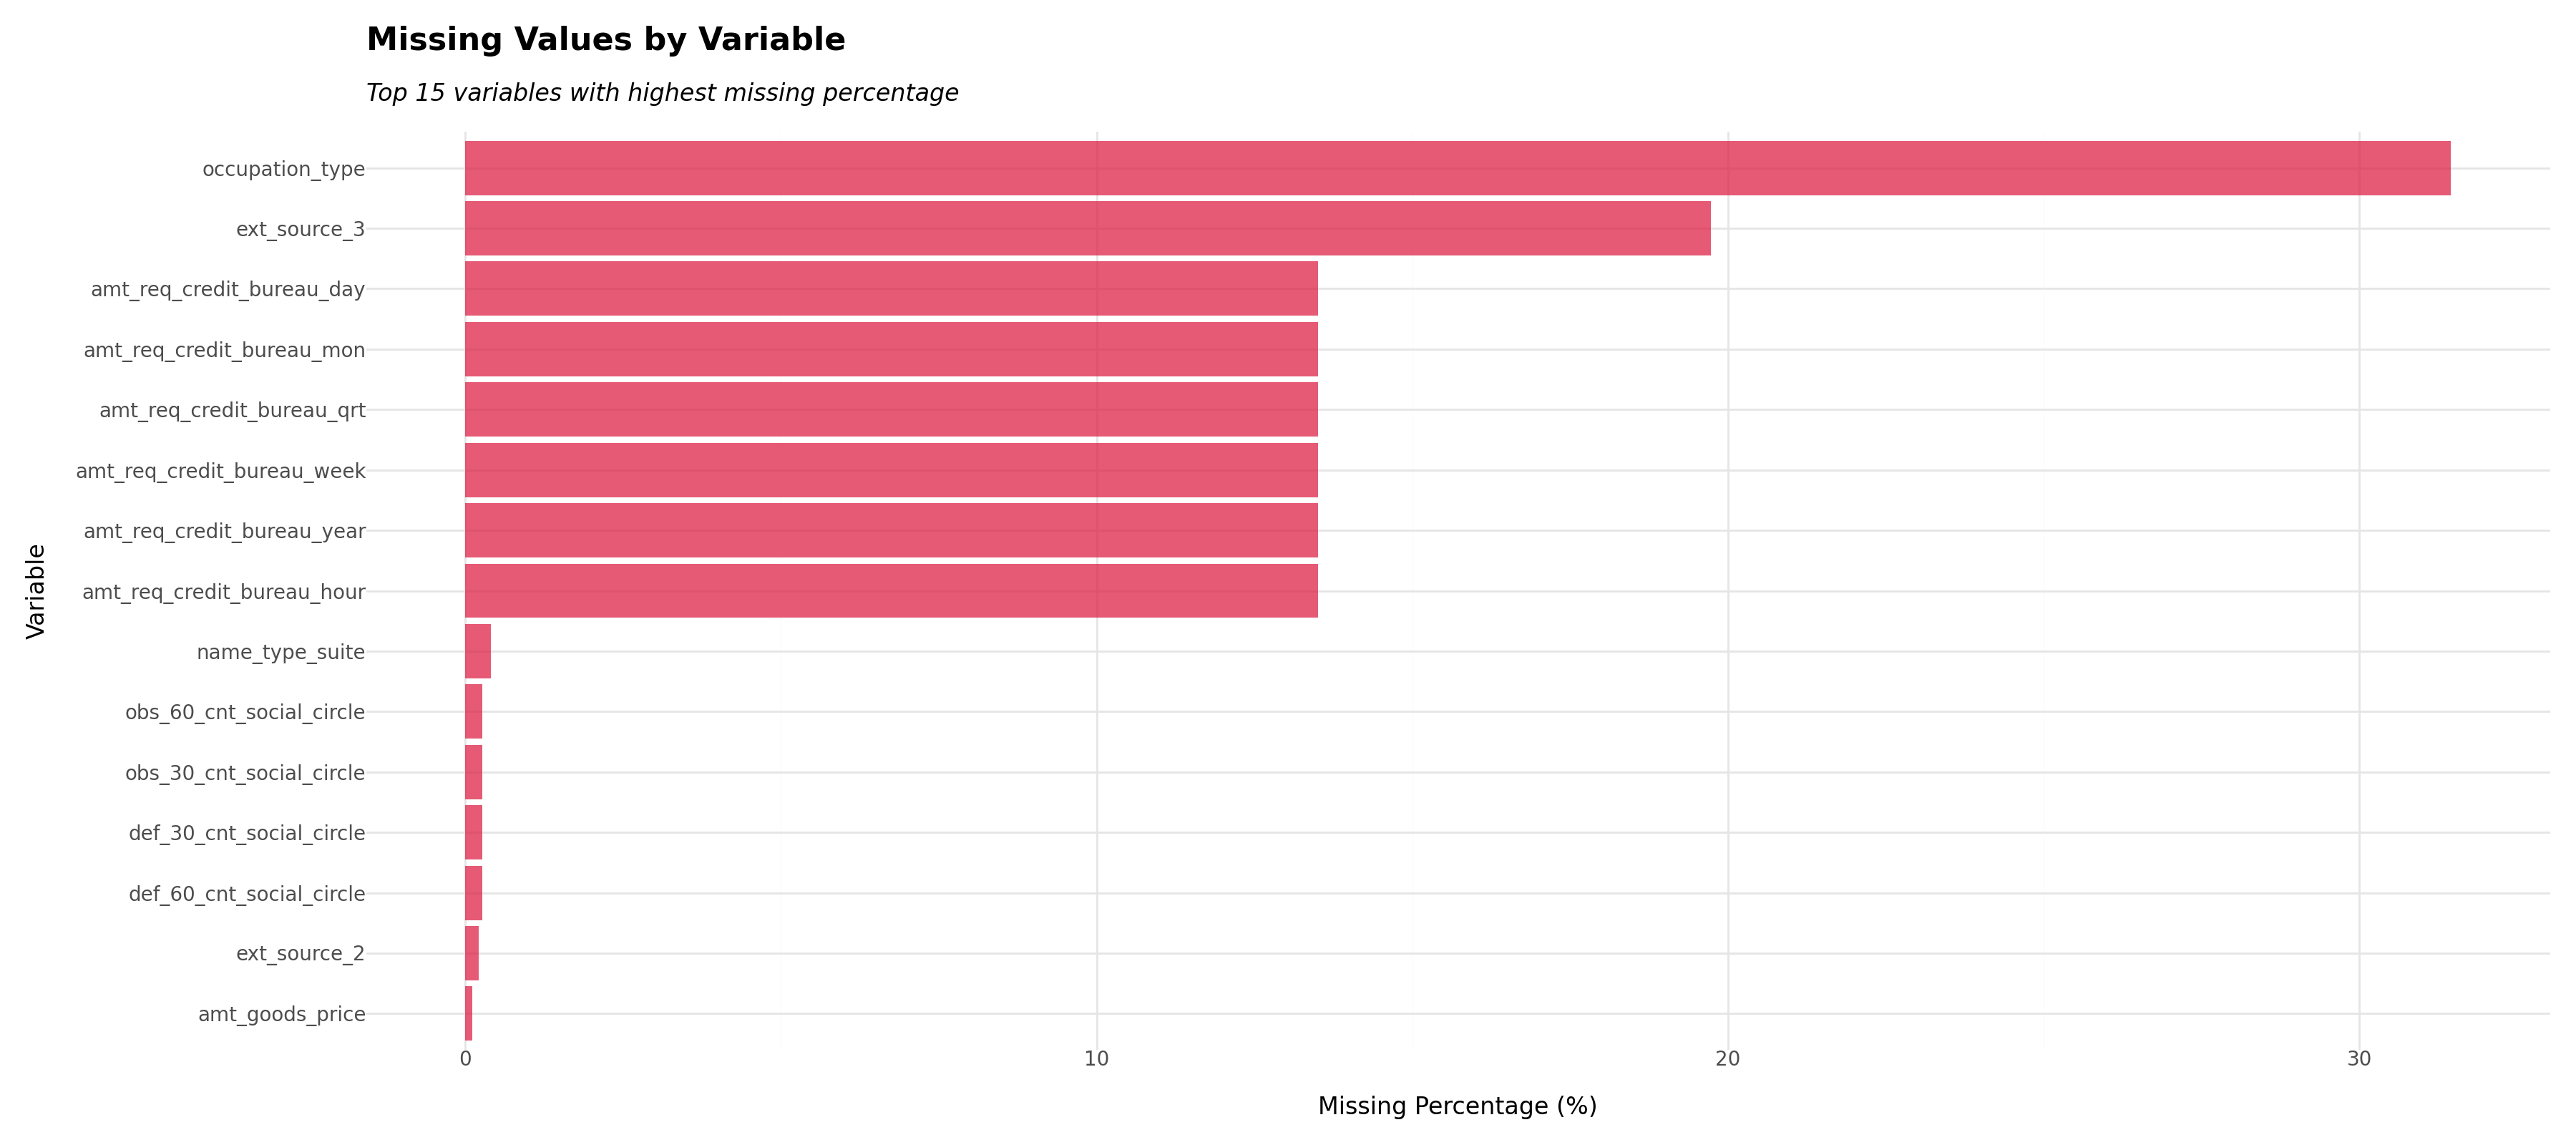

In [316]:
# Visualize missing values using plotnine (FIXED)
if len(missing_summary) > 0:
    top_missing = missing_summary.head(15)  # Top 15
    
    plot = (ggplot(top_missing, aes(x='reorder(Variable, Missing_Percentage)', y='Missing_Percentage')) +
            geom_col(fill='#DC143C', alpha=0.7) +
            coord_flip() +
            labs(title='Missing Values by Variable',
                 subtitle='Top 15 variables with highest missing percentage',
                 x='Variable',
                 y='Missing Percentage (%)'))
else:
    print("No missing values to visualize.")
plot


#### Check for negative values in employment

In [317]:
# Simple outliers for key money fields
key_money = [c for c in ['amt_income_total','amt_credit','amt_annuity'] if c in df.columns]
out_rows = []
for col in key_money:
    s = df[col].dropna()
    if s.empty:
        continue
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    low, high = q1 - 1.5*iqr, q3 + 1.5*iqr
    out_count = int(((s < low) | (s > high)).sum())
    out_pct = round(out_count / len(s) * 100, 2)
    out_rows.append({'column': col, 'outliers': out_count, 'pct': out_pct})
    display(pd.DataFrame(out_rows))

,column,outliers,pct
0,amt_income_total,882,4.41


,column,outliers,pct
0,amt_income_total,882,4.41
1,amt_credit,451,2.25


,column,outliers,pct
0,amt_income_total,882,4.41
1,amt_credit,451,2.25
2,amt_annuity,498,2.49


### Data Quality Summary

**Key Findings:**

1. **Missing Values**: The dataset shows varying levels of missing data across variables, with some variables having substantial missing rates that may require to drop the variable or impute the missing values.
2. **Outliers**: Financial variables show expected outliers in income and credit amounts, which is typical in financial data and may represent legitimate high-value cases.
3. **Data Consistency**: Most variables show expected ranges and formats, with date variables properly encoded as days before application.

**Implications for Analysis:**

- The data seems to be clean and consistent, with no major issues found. The two variables with missing data  are

| Variable        | Missing Count | Missing Percentage |
|:----------------|:--------------|:-------------------|
| occupation_type | 6290         | 31.45              |
| ext_source_3    | 3945         | 19.73              |


- Outliers in financial variables may need treatment depending on analysis goals. For example

| Variable         | Outliers | Percentage |
|:-----------------|:---------|:-----------|
| amt_income_total | 882      | 4.41%      |
| amt_credit       | 451      | 2.26%      |
| amt_annuity      | 498      | 2.49%      |

## Data Cleaning

In [318]:
# step 1: data preparation
# create a working copy of the original data to avoid modifying the raw dataset
working_dataframe = df.copy()

# remove any exact duplicate rows (though we found 0 duplicates earlier)
working_dataframe = working_dataframe.drop_duplicates().reset_index(drop=True)

In [319]:
# find all columns that start with 'days_' first convert them to positive years
days_cols = [c for c in working_dataframe.columns if c.startswith('days_')]
days_cols

['days_birth',
 'days_employed',
 'days_registration',
 'days_id_publish',
 'days_last_phone_change']

In [320]:
# Check the original days_employed for the unemployment code (365243)
print("Checking original DAYS_EMPLOYED values:")
print(working_dataframe['days_employed'].describe())

Checking original DAYS_EMPLOYED values:
count     20000.00000
mean      63741.47790
std      141256.20277
min      -17546.00000
25%       -2783.00000
50%       -1211.00000
75%        -278.00000
max      365243.00000
Name: days_employed, dtype: float64


In [321]:
# The unemployment code is 365243 (a specific value, not just any large number)
unemployment_code = 365243
unemployed_count = (working_dataframe['days_employed'] == unemployment_code).sum()
print(f"Unemployed individuals (code 365243): {unemployed_count}")

Unemployed individuals (code 365243): 3599


In [322]:
# Replace unemployment code with NaN BEFORE conversion
working_dataframe.loc[working_dataframe['days_employed'] == unemployment_code, 'days_employed'] = np.nan

In [323]:
# step 2: temporal variable transformation
# convert negative days into positive years for better human interpretation
# days_birth: negative days from birth → positive age in years
# days_employed: negative days from employment start → positive employment years

# convert birthdays to age: divide by 365 to get years, round to 1 decimal place
working_dataframe['age_years'] = (-working_dataframe['days_birth'] / 365).round(3)

# convert employment days to years: divide by 365 to get years, round to 1 decimal place
working_dataframe['employment_years'] = (-working_dataframe['days_employed'] / 365).round(3)

# convert registration days to years: divide by 365 to get years, round to 2 decimal places
working_dataframe['registration_years'] = (-working_dataframe['days_registration'] / 365).round(3)

# convert days since identification to years: divide by 365 to get years, round to 2 decimal places
working_dataframe['id_years'] = (-working_dataframe['days_id_publish'] / 365).round(3)

# convert days since last phone change to years: divide by 365 to get years, round to 2 decimal places
working_dataframe['phone_change_years'] = (-working_dataframe['days_last_phone_change'] / 365).round(3)


In [324]:
# check for anomalies in the new temporal variables
temporal_vars = ['age_years',  'employment_years', 'registration_years',
                    'id_years', 'phone_change_years']
working_dataframe[temporal_vars].describe()

,age_years,employment_years,registration_years,id_years,phone_change_years
count,20000.000000,16401.000000,20000.000000,20000.000000,20000.000000
mean,44.060263,6.628398,13.695389,8.178820,2.632729
std,12.016054,6.574807,9.750887,4.110728,2.267148
min,21.036000,0.079000,0.000000,0.000000,0.000000
25%,34.052000,2.099000,5.514250,4.717250,0.756000
50%,43.408000,4.548000,12.269500,8.852000,2.063000
75%,54.093000,8.852000,20.534750,11.740000,4.290000
max,69.027000,48.071000,57.096000,19.718000,11.466000


In [325]:
# see the converted days converted id, phone change, registration
working_dataframe[['days_birth', 'age_years', 'days_employed', 'employment_years', 'days_registration', 'registration_years',
                    'days_id_publish', 'id_years', 'days_last_phone_change', 'phone_change_years']].head()

,days_birth,age_years,days_employed,employment_years,days_registration,registration_years,days_id_publish,id_years,days_last_phone_change,phone_change_years
0,-14086,38.592,-3028.0,8.296,-643,1.762,-4911,13.455,-4,0.011
1,-8728,23.912,-1157.0,3.170,-3494,9.573,-1368,3.748,-925,2.534
2,-12931,35.427,-1317.0,3.608,-6392,17.512,-3866,10.592,-3,0.008
3,-19334,52.970,-3494.0,9.573,-2419,6.627,-2893,7.926,0,0.000
4,-11144,30.532,-1104.0,3.025,-7846,21.496,-2904,7.956,-397,1.088


In [326]:
# drop original days columns to avoid confusion
working_dataframe = working_dataframe.drop(columns=days_cols)

In [327]:
# lets check the missing values again after our transformations
missing_data_after = working_dataframe.isnull().sum()
missing_summary_after = (pd.DataFrame({
    'variable': missing_data_after.index,
    'missing_count': missing_data_after.values,
    'missing_percentage': (missing_data_after.values / len(working_dataframe)) * 100
}).query('missing_count > 0')
  .sort_values('missing_count', ascending=False))

missing_summary_after

,variable,missing_count,missing_percentage
21,occupation_type,6290,31.450
35,ext_source_3,3945,19.725
64,employment_years,3599,17.995
62,amt_req_credit_bureau_year,2701,13.505
60,amt_req_credit_bureau_mon,2701,13.505
58,amt_req_credit_bureau_day,2701,13.505
59,amt_req_credit_bureau_week,2701,13.505
57,amt_req_credit_bureau_hour,2701,13.505
61,amt_req_credit_bureau_qrt,2701,13.505
10,name_type_suite,81,0.405


In [328]:
# Missing Value Patterns by Target Class (as DataFrame)
missing_analysis = missing_summary_after[missing_summary_after['missing_count'] > 0].sort_values('missing_percentage', ascending=False).reset_index(drop=True)

missing_by_class_list = []

for var in missing_analysis['variable'].head(5):  # Top 5 variables with most missing
    missing_by_target = working_dataframe.groupby('target')[var].apply(lambda x: x.isna().sum())
    total_by_target = working_dataframe['target'].value_counts()
    pct_by_target = (missing_by_target / total_by_target * 100).round(2)
    
    # Calculate difference
    difference = abs(pct_by_target[0] - pct_by_target[1])
    significant = "Yes" if difference > 5 else "No"
    
    missing_by_class_list.append({
        'variable': var,
        'no_default_missing_pct': pct_by_target[0],
        'default_missing_pct': pct_by_target[1],
        'difference_pct': round(difference, 2),
        'significant_diff': significant
    })

# Create DataFrame
missing_by_class_df = pd.DataFrame(missing_by_class_list)

# Optional: Style it for better visualization
missing_by_class_df.style.background_gradient(subset=['difference_pct'], cmap='YlOrRd')

,variable,no_default_missing_pct,default_missing_pct,difference_pct,significant_diff
0,occupation_type,32.010000,24.790000,7.220000,Yes
1,ext_source_3,19.480000,22.660000,3.180000,No
2,employment_years,18.480000,12.200000,6.280000,Yes
3,amt_req_credit_bureau_year,13.180000,17.430000,4.250000,No
4,amt_req_credit_bureau_mon,13.180000,17.430000,4.250000,No


In [329]:
# step 3: column type identification
# after adding new temporal features (age_years, employment_years), we need to 
# re-identify which columns are categorical vs numeric for proper preprocessing

# identify categorical columns (text-based data like gender, occupation, etc.)
categorical_features = working_dataframe.select_dtypes(include=['object', 'category']).columns.tolist()

# identify numeric columns (numbers like income, credit amount, age, etc.) excluding target
numerical_features = working_dataframe.select_dtypes(include=['number']).columns.tolist()

# remove target variable from feature lists since it's our prediction target, not a feature
target = 'target'
if target in categorical_features:
    categorical_features.remove(target)
if target in numerical_features:
    numerical_features.remove(target)

# display summary of column types for verification
print(f"categorical columns: {len(categorical_features)}")
print(f"numeric columns: {len(numerical_features)} (now includes years variables)")
print(f"sample numeric columns: {numerical_features[:5]}")

print(f"\nsample categorical columns: {categorical_features[:5]}")

categorical columns: 12
numeric columns: 55 (now includes years variables)
sample numeric columns: ['cnt_children', 'amt_income_total', 'amt_credit', 'amt_annuity', 'amt_goods_price']

sample categorical columns: ['name_contract_type', 'code_gender', 'flag_own_car', 'flag_own_realty', 'name_type_suite']


In [330]:
# see if target variable is still present
target in categorical_features

False

In [331]:
# we need to lowercase all values in categorical/string columns
for col in categorical_features:
    working_dataframe[col] = working_dataframe[col].str.lower()

In [332]:
# check a sample of the modified categorical columns
working_dataframe[categorical_features].head()

,name_contract_type,code_gender,flag_own_car,flag_own_realty,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,occupation_type,weekday_appr_process_start,organization_type
0,cash loans,m,y,n,unaccompanied,working,secondary / secondary special,married,house / apartment,drivers,thursday,self-employed
1,cash loans,m,y,y,family,working,secondary / secondary special,single / not married,rented apartment,laborers,saturday,business entity type 2
2,cash loans,m,n,n,unaccompanied,working,secondary / secondary special,married,house / apartment,drivers,thursday,government
3,cash loans,f,n,y,unaccompanied,working,secondary / secondary special,married,house / apartment,cleaning staff,saturday,business entity type 3
4,cash loans,f,n,y,family,working,secondary / secondary special,civil marriage,house / apartment,private service staff,tuesday,services


In [333]:
# handle missing data
# Missing Value Imputation Strategy
# handle missing data
from sklearn.impute import SimpleImputer

# Track what we're imputing
numeric_with_missing = [col for col in numerical_features if working_dataframe[col].isna().sum() > 0]
print(f"Imputing {len(numeric_with_missing)} numeric variables with median...")

Imputing 15 numeric variables with median...


In [334]:
# Impute
num_imputer = SimpleImputer(strategy='median')
working_dataframe[numerical_features] = num_imputer.fit_transform(working_dataframe[numerical_features])

# Create summary DataFrame
imputation_summary = pd.DataFrame({
    'variable': numeric_with_missing,
    'method': 'median',
    'imputed_value': num_imputer.statistics_[:len(numeric_with_missing)]
}).round(3)

display(imputation_summary)


,variable,method,imputed_value
0,amt_annuity,median,0.000
1,amt_goods_price,median,144000.000
2,ext_source_2,median,518562.000
3,ext_source_3,median,24918.750
4,obs_30_cnt_social_circle,median,450000.000
5,def_30_cnt_social_circle,median,0.019
6,obs_60_cnt_social_circle,median,1.000
7,def_60_cnt_social_circle,median,0.000
8,amt_req_credit_bureau_hour,median,1.000
9,amt_req_credit_bureau_day,median,0.000


In [335]:
# verify no missing values remain in numeric features
working_dataframe[numerical_features].isnull().sum().sum()

np.int64(0)

In [336]:
# handle occupation_type - missing likely means "unemployed" or "unknown"
working_dataframe['occupation_type'] = working_dataframe['occupation_type'].fillna('unknown')
working_dataframe['occupation_type'].isnull().sum()

np.int64(0)

In [337]:
# handle missing values in categorical columns by imputing
categorical_with_missing = [col for col in categorical_features
                            if working_dataframe[col].isna().sum() > 0]
from sklearn.impute import SimpleImputer
cat_imputer = SimpleImputer(strategy='most_frequent')
working_dataframe[categorical_with_missing] = cat_imputer.fit_transform(working_dataframe[categorical_with_missing])
# verify no missing values remain in categorical features
working_dataframe[categorical_features].isnull().sum().sum()

np.int64(0)

In [338]:
# handle the outliers in numeric columns

def detect_outliers_iqr(series, multiplier=1.5):
    """Detect outliers using IQR method"""
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    outliers = (series < lower_bound) | (series > upper_bound)
    return outliers, lower_bound, upper_bound

In [339]:
outlier_report = []
for col in numerical_features:
    if col in working_dataframe.columns:
        series = working_dataframe[col].dropna()
        outliers, lower, upper = detect_outliers_iqr(series)

        outlier_count = outliers.sum()
        outlier_pct = (outlier_count / len(series)) * 100

        outlier_report.append({
            'variable': col,
            'total_values': len(series),
            'outliers_count': outlier_count,
            'outliers_pct': round(outlier_pct, 2),
            'lower_bound': round(lower, 2),
            'upper_bound': round(upper, 2),
            'min_value': round(series.min(), 2),
            'max_value': round(series.max(), 2)
        })

outlier_df = pd.DataFrame(outlier_report).sort_values('outliers_pct', ascending=False)
display(outlier_df[outlier_df['outliers_count'] > 0])

,variable,total_values,outliers_count,outliers_pct,lower_bound,upper_bound,min_value,max_value
12,region_rating_client,20000,5268,26.34,2.00,2.00,1.00,3.00
13,region_rating_client_w_city,20000,5120,25.60,2.00,2.00,1.00,3.00
19,reg_city_not_work_city,20000,4584,22.92,0.00,0.00,0.00,1.00
7,flag_work_phone,20000,4027,20.14,0.00,0.00,0.00,1.00
6,flag_emp_phone,20000,3599,18.00,1.00,1.00,0.00,1.00
20,live_city_not_work_city,20000,3551,17.76,0.00,0.00,0.00,1.00
48,amt_req_credit_bureau_qrt,20000,3170,15.85,0.00,0.00,0.00,8.00
47,amt_req_credit_bureau_mon,20000,2832,14.16,0.00,0.00,0.00,19.00
24,def_30_cnt_social_circle,20000,2288,11.44,0.00,0.00,0.00,6.00
30,flag_document_6,20000,1710,8.55,0.00,0.00,0.00,1.00


In [340]:
# identify which variables to treat based on type
financial_vars = [col for col in numerical_features if col.startswith('amt_')]
temporal_vars = [col for col in numerical_features if col in ['age_years', 'employment_years']]

# Variables that should be treated (high outliers matter for model)
vars_to_treat = financial_vars + temporal_vars

print(f"Variables flagged for outlier treatment: {len(vars_to_treat)}")
print(f"Financial: {financial_vars}")
print(f"Temporal: {temporal_vars}")


Variables flagged for outlier treatment: 12
Financial: ['amt_income_total', 'amt_credit', 'amt_annuity', 'amt_goods_price', 'amt_req_credit_bureau_hour', 'amt_req_credit_bureau_day', 'amt_req_credit_bureau_week', 'amt_req_credit_bureau_mon', 'amt_req_credit_bureau_qrt', 'amt_req_credit_bureau_year']
Temporal: ['age_years', 'employment_years']


In [341]:
# show outlier impact on target
outlier_impact = []
for col in vars_to_treat:
    if col in working_dataframe.columns:
        series = working_dataframe[col].dropna()
        outliers, _, _ = detect_outliers_iqr(series)
        
        # Create temporary outlier indicator
        temp_outlier_col = f'{col}_is_outlier'
        working_dataframe[temp_outlier_col] = False
        working_dataframe.loc[series.index[outliers], temp_outlier_col] = True
        
        # Calculate default rates
        default_rate_outliers = working_dataframe[working_dataframe[temp_outlier_col]]['target'].mean() * 100
        default_rate_normal = working_dataframe[~working_dataframe[temp_outlier_col]]['target'].mean() * 100
        
        outlier_impact.append({
            'variable': col,
            'default_rate_outliers_%': round(default_rate_outliers, 2),
            'default_rate_normal_%': round(default_rate_normal, 2),
            'difference_%': round(default_rate_outliers - default_rate_normal, 2)
        })
        
        # Drop temporary column
        working_dataframe.drop(columns=[temp_outlier_col], inplace=True)

outlier_impact_df = pd.DataFrame(outlier_impact)
display(outlier_impact_df)

,variable,default_rate_outliers_%,default_rate_normal_%,difference_%
0,amt_income_total,5.90,7.83,-1.93
1,amt_credit,3.33,7.85,-4.52
2,amt_annuity,3.41,7.86,-4.44
3,amt_goods_price,3.26,7.97,-4.71
4,amt_req_credit_bureau_hour,9.52,7.74,1.79
5,amt_req_credit_bureau_day,2.47,7.77,-5.30
6,amt_req_credit_bureau_week,8.05,7.74,0.32
7,amt_req_credit_bureau_mon,6.60,7.93,-1.33
8,amt_req_credit_bureau_qrt,6.78,7.93,-1.14
9,amt_req_credit_bureau_year,8.67,7.72,0.95


In [342]:
# STEP 4: Apply winsorization ONLY to variables that need it

def winsorize_column(df, column, lower_percentile=0.01, upper_percentile=0.99):
    """Cap outliers at specified percentiles"""
    lower_bound = df[column].quantile(lower_percentile)
    upper_bound = df[column].quantile(upper_percentile)
    
    original_min = df[column].min()
    original_max = df[column].max()
    
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    
    return {
        'variable': column,
        'original_min': round(original_min, 2),
        'original_max': round(original_max, 2),
        'new_min': round(df[column].min(), 2),
        'new_max': round(df[column].max(), 2),
        'capped_at_1st': round(lower_bound, 2),
        'capped_at_99th': round(upper_bound, 2)
    }

print("Applying Winsorization (1st to 99th percentile)")

winsorization_report = []
for col in vars_to_treat:  # Only treat selected variables
    if col in working_dataframe.columns:
        result = winsorize_column(working_dataframe, col, 0.01, 0.99)
        winsorization_report.append(result)

winsor_df = pd.DataFrame(winsorization_report)
display(winsor_df)

print("Outliers treated using winsorization for financial and temporal variables")
print(f"{len(vars_to_treat)} variables processed")
print(f"Other variables left unchanged (valid variation)")

Applying Winsorization (1st to 99th percentile)


,variable,original_min,original_max,new_min,new_max,capped_at_1st,capped_at_99th
0,amt_income_total,26100.00,9000000.00,45000.00,472500.00,45000.00,472500.00
1,amt_credit,45000.00,3375000.00,76499.10,1892241.00,76499.10,1892241.00
2,amt_annuity,1615.50,208215.00,6106.45,70272.76,6106.46,70272.76
3,amt_goods_price,45000.00,3375000.00,67500.00,1800000.00,67500.00,1800000.00
4,amt_req_credit_bureau_hour,0.00,3.00,0.00,0.00,0.00,0.00
5,amt_req_credit_bureau_day,0.00,5.00,0.00,0.00,0.00,0.00
6,amt_req_credit_bureau_week,0.00,6.00,0.00,1.00,0.00,1.00
7,amt_req_credit_bureau_mon,0.00,19.00,0.00,4.00,0.00,4.00
8,amt_req_credit_bureau_qrt,0.00,8.00,0.00,2.00,0.00,2.00
9,amt_req_credit_bureau_year,0.00,17.00,0.00,8.00,0.00,8.00


Outliers treated using winsorization for financial and temporal variables
12 variables processed
Other variables left unchanged (valid variation)


In [343]:
# after cleaning, check missing values again
final_missing = working_dataframe.isnull().sum().sum()

In [344]:
# after cleaning, check shape again
working_dataframe.shape

(20000, 68)

### Statistical Feature-Target Relationship Analysis
This section would include statistical tests and visualizations to analyze the relationship between features and the target variable

In [345]:
# Identify top predictors as DataFrame
top_predictors_df = corr_df.head(10).copy()

# Add direction column
top_predictors_df['direction'] = top_predictors_df['correlation'].apply(
    lambda x: "increases" if x > 0 else "decreases"
)

# Add interpretation column
top_predictors_df['interpretation'] = top_predictors_df.apply(
    lambda row: f"{row['direction']} default risk", axis=1
)

# Reorder columns for clarity
top_predictors_df = top_predictors_df[['feature', 'correlation', 'abs_correlation', 'direction', 'interpretation']]

display(top_predictors_df)

,feature,correlation,abs_correlation,direction,interpretation
22,ext_source_3,-0.158917,0.158917,decreases,decreases default risk
21,ext_source_2,-0.156841,0.156841,decreases,decreases default risk
50,age_years,-0.075693,0.075693,decreases,decreases default risk
19,reg_city_not_work_city,0.056060,0.056060,increases,increases default risk
51,employment_years,-0.055569,0.055569,decreases,decreases default risk
54,phone_change_years,-0.054348,0.054348,decreases,decreases default risk
53,id_years,-0.053486,0.053486,decreases,decreases default risk
18,reg_city_not_live_city,0.052571,0.052571,increases,increases default risk
13,region_rating_client_w_city,0.051197,0.051197,increases,increases default risk
12,region_rating_client,0.049742,0.049742,increases,increases default risk


In [346]:
# Categorical default rate analysis - single DataFrame
categorical_analysis = []

for col in categorical_features:
    if col in working_dataframe.columns:
        default_rates = working_dataframe.groupby(col)['target'].agg(['mean', 'count'])
        default_rates = default_rates[default_rates['count'] >= 50]

        if len(default_rates) > 0:
            max_default_rate = default_rates['mean'].max() * 100
            min_default_rate = default_rates['mean'].min() * 100
            spread = max_default_rate - min_default_rate

            categorical_analysis.append({
                'feature': col,
                'categories': len(default_rates),
                'min_default_%': round(min_default_rate, 2),
                'max_default_%': round(max_default_rate, 2),
                'spread_%': round(spread, 2)
            })

# Create and sort DataFrame
cat_analysis_df = (pd.DataFrame(categorical_analysis)
                   .sort_values('spread_%', ascending=False)
                   .reset_index(drop=True))

# Add rank column
cat_analysis_df.insert(0, 'rank', range(1, len(cat_analysis_df) + 1))

print("\nCategorical Features - Default Rate Analysis (sorted by spread):")
display(cat_analysis_df)


Categorical Features - Default Rate Analysis (sorted by spread):


,rank,feature,categories,min_default_%,max_default_%,spread_%
0,1,organization_type,36,1.60,12.68,11.08
1,2,occupation_type,16,4.46,14.77,10.31
2,3,name_housing_type,6,4.48,10.86,6.38
3,4,name_education_type,4,5.12,10.80,5.68
4,5,name_type_suite,6,6.65,11.57,4.92
5,6,name_income_type,4,5.25,9.15,3.89
6,7,name_family_status,5,5.59,9.44,3.85
7,8,code_gender,2,6.64,9.88,3.24
8,9,name_contract_type,2,5.29,8.00,2.72
9,10,weekday_appr_process_start,7,7.06,8.28,1.22


### Multicollinearity Check

In [347]:
# Multicollinearity Check (document only, don't drop)

# Calculate correlation matrix
numerical_for_corr = [col for col in numerical_features if col in working_dataframe.columns]
corr_matrix = working_dataframe[numerical_for_corr].corr()

# Find highly correlated pairs
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_value = corr_matrix.iloc[i, j]
        if abs(corr_value) > 0.8:
            high_corr_pairs.append({
                'feature_1': corr_matrix.columns[i],
                'feature_2': corr_matrix.columns[j],
                'correlation': round(corr_value, 3)
            })

if high_corr_pairs:
    high_corr_df = pd.DataFrame(high_corr_pairs).sort_values('correlation', ascending=False, key=abs)
    print(f"Highly Correlated Feature Pairs (|r| > 0.8):")
    display(high_corr_df)
    print("Features documented but NOT dropped - will be evaluated in Part 3")
else:
    print("No highly correlated pairs found (|r| > 0.8)")

print(f"Final Part 1 Dataset:")
print(f"Shape: {working_dataframe.shape}")
print(f"Features retained: {working_dataframe.shape[1] - 1}")

Highly Correlated Feature Pairs (|r| > 0.8):


,feature_1,feature_2,correlation
5,obs_30_cnt_social_circle,obs_60_cnt_social_circle,0.998
1,amt_credit,amt_goods_price,0.987
2,region_rating_client,region_rating_client_w_city,0.952
0,cnt_children,cnt_fam_members,0.881
3,reg_region_not_work_region,live_region_not_work_region,0.862
6,def_30_cnt_social_circle,def_60_cnt_social_circle,0.855
4,reg_city_not_work_city,live_city_not_work_city,0.828


Features documented but NOT dropped - will be evaluated in Part 3
Final Part 1 Dataset:
Shape: (20000, 68)
Features retained: 67


In [348]:
# create a summary of categorical variables showing the most frequent values for each column.
def categorical_summary(dframe: pd.DataFrame, top_n: int = 10) -> pd.DataFrame:

    # identify all categorical columns (text-based data like gender, occupation, etc.)
    categorical_columns = dframe.select_dtypes(include=["object", "category"])
    
    rows = []
    
    # step 3: loop through each categorical column to analyze its values
    for column in categorical_columns.columns:
        vc = categorical_columns[column].value_counts(dropna=False).head(top_n)
        
        # for each value-count pair, create a dictionary with column name, value, and count
        for k, v in vc.items():
            rows.append({
                "column": column,    # which categorical variable this is
                "value": k,         # the actual category value (e.g., "male", "manager")
                "count": int(v)     # how many times this value appears (convert to regular int)
            })
    
    # step 5: convert list of dictionaries to DataFrame for easy viewing and analysis
    return pd.DataFrame(rows)

# apply the function to analyze categorical variables in our working dataset
# top_n=8 means we'll see the 8 most frequent values for each categorical column
categorical_cols_summary = categorical_summary(working_dataframe, top_n=8)

# display the results - this shows the most common categories across all categorical variables
categorical_cols_summary


,column,value,count
0,name_contract_type,cash loans,18089
1,name_contract_type,revolving loans,1911
2,code_gender,f,13189
3,code_gender,m,6811
4,flag_own_car,n,13213
...,...,...,...
57,organization_type,other,1115
58,organization_type,medicine,716
59,organization_type,business entity type 2,703
60,organization_type,government,663


In [349]:
RARE_THRESHOLD = 0.02
HIGH_CARDINALITY_VALUE = 8
TARGET = 'target'

In [350]:
def categorical_unique_counts(df_to_check: pd.DataFrame, top_n: int = None) -> pd.DataFrame:
    categorical_cols = df_to_check.select_dtypes(include=['object', 'category']).columns.tolist()
    counts_df = pd.DataFrame({
        "column": categorical_cols,
        "unique_count": [df_to_check[col].nunique(dropna=False) for col in categorical_cols]
    }).sort_values("unique_count", ascending=False).reset_index(drop=True)
    if top_n is not None:
        counts_df = counts_df.head(top_n)
    return counts_df

In [351]:
# count unique values for each categorical column
# create and sort the DataFrame by unique_count descending
cat_unique_counts_df = categorical_unique_counts(working_dataframe)

cat_unique_counts_df

,column,unique_count
0,organization_type,58
1,occupation_type,19
2,name_income_type,8
3,name_type_suite,7
4,weekday_appr_process_start,7
5,name_housing_type,6
6,name_family_status,5
7,name_education_type,5
8,flag_own_realty,2
9,flag_own_car,2


In [352]:
# step 4: identify high-cardinality categories
# find categorical columns that have too many unique values (> 8)
# these need special treatment to avoid creating too many dummy variables
# high cardinality = many unique categories (e.g., 50+ job types)
# low cardinality = few unique categories (e.g., male/female)

high_card_cols = cat_unique_counts_df[
    cat_unique_counts_df['unique_count'] > HIGH_CARDINALITY_VALUE
]['column'].tolist()
print(f"High-cardinality categorical columns (> {HIGH_CARDINALITY_VALUE} unique values):")
print(high_card_cols)

High-cardinality categorical columns (> 8 unique values):
['organization_type', 'occupation_type']


In [353]:
# step 4b: identify low-cardinality categories  
# find categorical columns with few unique values (<= 8)
# these can safely be one-hot encoded without creating too many features
# examples: gender (m/f), car ownership (y/n), education level (5 types)

low_card_cols = cat_unique_counts_df[cat_unique_counts_df['unique_count'] <= HIGH_CARDINALITY_VALUE]['column'].tolist()
print(f"Low-cardinality categorical columns (<= {HIGH_CARDINALITY_VALUE} unique values):")
print(low_card_cols)

Low-cardinality categorical columns (<= 8 unique values):
['name_income_type', 'name_type_suite', 'weekday_appr_process_start', 'name_housing_type', 'name_family_status', 'name_education_type', 'flag_own_realty', 'flag_own_car', 'code_gender', 'name_contract_type']


In [354]:
# step 5: rare category binning
# for high-cardinality columns only: combine rare categories into "other"
# this prevents the model from trying to learn patterns from categories with very few examples
# rare_threshold = 0.02 means any category appearing in < 2% of data becomes "other"
# example: if only 50 out of 20,000 people are "astronauts", group them as "other"

for col in high_card_cols:
    # Calculate frequency of each category as proportion of total data
    freq = working_dataframe[col].value_counts(normalize=True, dropna=False)
    
    # Find categories that appear less than 2% of the time
    rare_values = freq[freq < RARE_THRESHOLD].index
    
    # Replace rare values with "Other" to reduce cardinality while preserving information
    working_dataframe[col] = working_dataframe[col].where(~working_dataframe[col].isin(rare_values), "Other")

In [355]:
# CHECK: Show updated unique counts after binning
updated_cat_unique_counts_df = categorical_unique_counts(working_dataframe)
updated_cat_unique_counts_df

,column,unique_count
0,organization_type,12
1,occupation_type,11
2,name_income_type,8
3,name_type_suite,7
4,weekday_appr_process_start,7
5,name_housing_type,6
6,name_family_status,5
7,name_education_type,5
8,flag_own_realty,2
9,flag_own_car,2


In [357]:
# After binning, show comparison
print("Cardinality Reduction Summary:")

comparison_df = pd.merge(
    cat_unique_counts_df, 
    updated_cat_unique_counts_df, 
    on='column', 
    suffixes=('_before', '_after')
)

comparison_df['reduction'] = comparison_df['unique_count_before'] - comparison_df['unique_count_after']
comparison_df['reduction_%'] = (comparison_df['reduction'] / comparison_df['unique_count_before'] * 100).round(1)

display(comparison_df)

# Show how many rare categories were binned
print("Rare Category Binning Results:")
for col in high_card_cols:
    before = cat_unique_counts_df[cat_unique_counts_df['column'] == col]['unique_count'].values[0]
    after = updated_cat_unique_counts_df[updated_cat_unique_counts_df['column'] == col]['unique_count'].values[0]
    reduced = before - after
    print(f"{col}: {before} → {after} categories (binned {reduced} rare values)")

# Save for Part 2
cardinality_info = {
    'high_cardinality_cols': high_card_cols,
    'low_cardinality_cols': low_card_cols,
    'rare_threshold': RARE_THRESHOLD,
    'high_cardinality_threshold': HIGH_CARDINALITY_VALUE
}

import json
with open(ARTIFACT_DIR / 'cardinality_info.json', 'w') as f:
    json.dump(cardinality_info, f, indent=2)

print(f"Cardinality info saved to artifacts/cardinality_info.json")

Cardinality Reduction Summary:


,column,unique_count_before,unique_count_after,reduction,reduction_%
0,organization_type,58,12,46,79.3
1,occupation_type,19,11,8,42.1
2,name_income_type,8,8,0,0.0
3,name_type_suite,7,7,0,0.0
4,weekday_appr_process_start,7,7,0,0.0
5,name_housing_type,6,6,0,0.0
6,name_family_status,5,5,0,0.0
7,name_education_type,5,5,0,0.0
8,flag_own_realty,2,2,0,0.0
9,flag_own_car,2,2,0,0.0


Rare Category Binning Results:
organization_type: 58 → 12 categories (binned 46 rare values)
occupation_type: 19 → 11 categories (binned 8 rare values)
Cardinality info saved to artifacts/cardinality_info.json


### Save the cleaned dataframe for Part 2

In [358]:
output_path = OUT_DIR / "cleaned_data_part1.csv"
working_dataframe.to_csv(output_path, index=False)
print(f"Cleaned dataset saved to: {output_path}")

Cleaned dataset saved to: processed_data\cleaned_data_part1.csv


In [359]:
# Save metadata
metadata = {
    'timestamp': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S'),
    'original_shape': (20000, 68),
    'cleaned_shape': working_dataframe.shape,
    'missing_values': int(working_dataframe.isnull().sum().sum()),
    'numerical_features': numerical_features,
    'categorical_features': categorical_features,
    'transformations_applied': [
        'Temporal variables converted to years',
        'Missing values imputed (median for numeric, mode for categorical)',
        'Outliers winsorized (1st-99th percentile)',
        'Rare categories binned (2% threshold)',
        'Employment anomalies fixed',
        'Strings lowercased'
    ]
}

In [360]:
metadata_path = ARTIFACT_DIR / "part1_metadata.json"
with open(metadata_path, 'w') as f:
    json.dump(metadata, f, indent=2)
print(f"Metadata saved to: {metadata_path}")

Metadata saved to: artifacts\part1_metadata.json


In [362]:
# Save feature lists
feature_lists = {
    'numerical_features': numerical_features,
    'categorical_features': categorical_features,
    'target': 'target'
}
feature_lists_path = ARTIFACT_DIR / "part1_feature_lists.json"
with open(feature_lists_path, 'w') as f:
    json.dump(feature_lists, f, indent=2)
print(f"Feature lists saved to: {feature_lists_path}")

Feature lists saved to: artifacts\part1_feature_lists.json
